In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math 
import seaborn as sns

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

In [2]:
def getData(num_samples):
    save_folder = 'train_0.5_valid_0.7_test'
    train_data = pd.read_csv('../data/' + save_folder + '/train_data_' + str(num_samples) + '_NaNmean.csv')
    X_train = train_data.drop(['Species'], axis = 1).values
    y_train = train_data[['Species']].copy().values
    valid_data = pd.read_csv('../data/' + save_folder + '/valid_data_NaNmean.csv')
    X_valid = valid_data.drop(['Species'], axis = 1).values
    y_valid = valid_data[['Species']].copy().values

    y_train = np.squeeze(y_train)
    n_values = np.max(y_train) + 1
    y_train = np.eye(n_values)[y_train]

    y_valid = np.squeeze(y_valid)
    n_values = np.max(y_valid) + 1
    y_valid = np.eye(n_values)[y_valid]
    return X_train, y_train, X_valid, y_valid

def getDataNormalization(num_samples):
    save_folder = 'train_0.5_valid_0.7_test'
    train_data = pd.read_csv('../data/' + save_folder + '/train_data_' + str(num_samples) + '_Normalization.csv')
    #X_train = train_data.drop(['Species', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)'], axis = 1).values
    X_train = train_data.drop(['Species'], axis = 1).values
    y_train = train_data[['Species']].copy().values
    valid_data = pd.read_csv('../data/' + save_folder + '/train_data_' + str(num_samples) + '_valid.csv')
    #X_valid = valid_data.drop(['Species', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)'], axis = 1).values
    X_valid = valid_data.drop(['Species'], axis = 1).values
    y_valid = valid_data[['Species']].copy().values
    
    # label should be int
    y_train = np.floor(y_train + 1.1).astype(int)
    y_train = np.squeeze(y_train)
    n_values = np.max(y_train) + 1
    y_train = np.eye(n_values)[y_train]
    
    # label should be int
    y_valid = np.floor(y_valid + 1.1).astype(int)
    y_valid = np.squeeze(y_valid)
    n_values = np.max(y_valid) + 1
    y_valid = np.eye(n_values)[y_valid]
    return X_train, y_train, X_valid, y_valid

In [19]:
# save_folder = 'data_nan_mean_no_Island'
# X_train = pd.read_csv('../data/' + save_folder + '/X_train.csv').values
# y_train = pd.read_csv('../data/' + save_folder + '/y_train.csv').values
# X_test = pd.read_csv('../data/' + save_folder + '/X_test.csv').values
# y_test = pd.read_csv('../data/' + save_folder + '/y_test.csv').values


# y_train = np.squeeze(y_train)
# n_values = np.max(y_train) + 1
# y_train = np.eye(n_values)[y_train]


# y_test = np.squeeze(y_test)
# n_values = np.max(y_test) + 1
# y_test = np.eye(n_values)[y_test]

In [39]:
def myWeight1(distances):
    sigma2 = 1 # we can change this number
    return np.exp(-distances**2/sigma2)

def myWeight2(distances):
    return 1/distances;

def myWeight3(distances):
    return 1/distances**2;

In [40]:
def calAccuary(y_predict, y_test):
    return np.sum(y_predict == y_test)/y_predict.size

In [52]:
def runKNN(neighbors, weight, X_train, y_train, X_valid, y_valid):
    knn = KNeighborsClassifier(n_neighbors=neighbors, weights=weight)
    knn.fit(X_train, y_train)
    y_predict = knn.predict(X_valid)
    y_predict = np.argmax(y_predict, axis=1)
    y_test_label = np.argmax(y_valid, axis=1)
    return calAccuary(y_predict, y_test_label)

In [61]:
X_train, y_train, X_valid, y_valid = getData(50)
print(X_train)
for k in range(1, 10):
    accuary_1 = runKNN(k, myWeight1, X_train, y_train, X_valid, y_valid)
    accuary_2 = runKNN(k, myWeight2, X_train, y_train, X_valid, y_valid)
    accuary_3 = runKNN(k, myWeight3, X_train, y_train, X_valid, y_valid)
    print(accuary_1, accuary_2, accuary_3)

[[ 5.14000000e+01  1.90000000e+01  2.01000000e+02  3.95000000e+03
   9.43782000e+00 -2.43620200e+01  0.00000000e+00]
 [ 4.75000000e+01  1.50000000e+01  2.18000000e+02  4.95000000e+03
   8.29671000e+00 -2.60854700e+01  1.00000000e+00]
 [ 3.89000000e+01  1.78000000e+01  1.81000000e+02  3.62500000e+03
   9.18718000e+00 -2.52179900e+01  1.00000000e+00]
 [ 5.58000000e+01  1.98000000e+01  2.07000000e+02  4.00000000e+03
   9.70465000e+00 -2.45349400e+01  0.00000000e+00]
 [ 4.67000000e+01  1.79000000e+01  1.95000000e+02  3.30000000e+03
   9.74144000e+00 -2.45946700e+01  1.00000000e+00]
 [ 4.62000000e+01  1.49000000e+01  2.21000000e+02  5.30000000e+03
   8.60092000e+00 -2.68437400e+01  0.00000000e+00]
 [ 4.52000000e+01  1.58000000e+01  2.15000000e+02  5.30000000e+03
   8.55868000e+00 -2.66779900e+01  0.00000000e+00]
 [ 4.64000000e+01  1.86000000e+01  1.90000000e+02  3.45000000e+03
   9.32105000e+00 -2.46416200e+01  1.00000000e+00]
 [ 3.60000000e+01  1.78000000e+01  1.95000000e+02  3.45000000e+0

In [60]:
X_train, y_train, X_valid, y_valid = getDataNormalization(50)
print(X_train)
for k in range(1, 10):
    accuary_1_norm = runKNN(k, myWeight1, X_train, y_train, X_valid, y_valid)
    accuary_2_norm = runKNN(k, myWeight2, X_train, y_train, X_valid, y_valid)
    accuary_3_norm = runKNN(k, myWeight3, X_train, y_train, X_valid, y_valid)
    print(accuary_1_norm, accuary_2_norm, accuary_3_norm)

[[ 1.39206105  1.02151552 -0.01107447 -0.2652594   1.29117612  1.75273728
  -1.08911786]
 [ 0.67996266 -1.22110911  1.16558801  0.87319297 -0.75424151 -0.60882851
   0.78867155]
 [-0.89030557  0.34872813 -1.39538328 -0.63525642  0.84190876  0.5798402
   0.78867155]
 [ 2.19545409  1.47004044  0.40421817 -0.20833678  1.76946374  1.51579281
  -1.08911786]
 [ 0.5338912   0.40479374 -0.42636711 -1.00525344  1.8354091   1.43394748
   0.78867155]
 [ 0.44259653 -1.27717472  1.37323434  1.2716513  -0.20895097 -1.64785169
  -1.08911786]
 [ 0.2600072  -0.77258418  0.95794169  1.2716513  -0.28466535 -1.42073194
  -1.08911786]
 [ 0.4791144   0.79725305 -0.77244431 -0.83448559  1.08186815  1.36961401
   0.78867155]
 [-1.41981462  0.34872813 -0.42636711 -0.83448559  0.40479442 -0.20654908
   0.78867155]
 [ 0.314784   -1.94996211  0.88872625  0.53165726 -1.68631354  0.30741983
   0.78867155]
 [ 1.13643598 -0.4922561   1.9961733   1.72703225 -1.02159001  0.33908642
  -1.08911786]
 [-1.36503782  1.30184

[0 0 0 2 2 1 2 2 0 0 0 2 2 2 2 2 2 2 0 0 2 1 0 0 2 0 2 1 1 0 0 2 0 0 2 2 0
 2 0 1 2 0 2 1 1 2 0 2 1 0 0 1 1 0 1 0 0 0 0 2 0 0 0 2 1 0 2 1]


AttributeError: 'numpy.ndarray' object has no attribute 'history'

In [ ]:
plt.rcParams['figure.figsize'] = [16, 8]
acc_values, val_acc_values = getHisAcc(his_1)
epochs = range(1, 1001, 5)
#plt.plot(epochs, acc_values[::1], 'bo', label='Training loss')
plt.plot(epochs, val_acc_values[::5], 'orange', label='weight1', linestyle='dashed')
acc_values, val_acc_values = getHisAcc(his_2)
plt.plot(epochs, val_acc_values[::5], 'magenta', label='weight2')

plt.xlabel('Epochs')
plt.ylabel('Validation accuracy')
#plt.yscale('log')
plt.ylim(0, 1.1)
#plt.xlim(0, 2000)
plt.legend()
plt.savefig('../pics/KNN/learning_rate_diff.svg', bbox_inches='tight')
plt.savefig('../pics/KNN/learning_rate_diff.pdf', bbox_inches='tight')
plt.show()

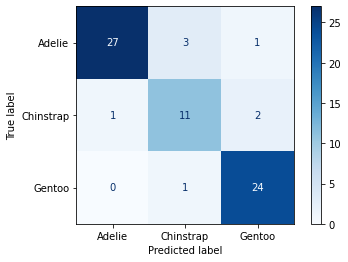

In [20]:
# from sklearn.metrics import ConfusionMatrixDisplay
# from sklearn.metrics import confusion_matrix
# import matplotlib.pyplot as plt





# # check classification accuracy of KNN with K=2
# knn = KNeighborsClassifier(n_neighbors=2, weights=myweight)
# knn.fit(X_train, y_train)

# # y_predict = knn.predict(X_test)
# # y_predict = np.argmax(y_predict, axis=1)
# # y_test_label = np.argmax(y_test, axis=1)


# # labels = ["Adelie", "Chinstrap", "Gentoo"]

# # cm = confusion_matrix(y_test_label, y_predict)

# # disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

# # disp.plot(cmap=plt.cm.Blues)
# # # plt.savefig('../pics/random_forest/confusion_matrix')
# # # plt.savefig('../pics/random_forest/confusion_matrix.pdf')
# # plt.show()